In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [7]:
data = pd.read_csv("/content/sample_data/Traffic data - updated main table.csv", encoding='latin-1')
data1 = pd.read_csv("/content/Keyword_lookup.csv")

In [6]:
data.head()

,Title ID,Title,Keyword ID,Keyword,Position,Previous position,Number of Results,Trends,Last Seen,Keyword Difficulty
0,1,PMP® Exam & Certification | Flat 40% Off - Enr...,1,pmp certification,1,1,166000000,"[67,54,81,81,67,67,81,67,81,81,67,67]",2024-12-31,78.0
1,1,PMP® Exam & Certification | Flat 40% Off - Enr...,1,pmp certification,4,4,176000000,"[67,54,81,81,67,67,81,67,81,81,67,67]",2025-01-02,82.0
2,4,PMP® Certification | Ace PMP Exam in 1st Attempt,1,pmp certification,3,3,165000000,"[54,81,81,67,67,81,67,81,81,67,67,81]",2025-01-07,78.0
3,23,CSM Scrum Master Course Online | Today's Offer...,2,scrum master certification,1,1,32000000,"[44,54,54,44,44,44,54,54,44,54,44,44]",2025-01-10,70.0
4,4,PMP® Certification | Ace PMP Exam in 1st Attempt,1,pmp certifications,1,1,35300000,"[16,36,44,66,100,44,27,20,44,36,52,44]",2025-01-19,73.0


In [8]:
data1.head()

,Keyword ID,Keyword,Search Volume,CPC,Traffic Cost,Traffic,Traffic Cost (%),Traffic (%),Competition
0,1,PMP Certification,12681,4.32,962,260,148.00%,139.02%,0.45
1,2,Scrum Master Certification,4935,3.34,354,108,54.27%,57.58%,0.49
2,3,AWS Certification,475,1.34,3,3,0.50%,1.25%,0.23
3,4,ITIL Certification,1507,3.62,85,36,12.83%,19.22%,0.41
4,5,TOGAF Certification,733,2.99,22,9,3.11%,4.22%,0.42


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title ID            199 non-null    int64  
 1   Title               199 non-null    object 
 2   Keyword ID          199 non-null    int64  
 3   Keyword             199 non-null    object 
 4   Position            199 non-null    int64  
 5   Previous position   199 non-null    int64  
 6   Number of Results   199 non-null    int64  
 7   Trends              199 non-null    object 
 8   Last Seen           199 non-null    object 
 9   Keyword Difficulty  198 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 15.7+ KB


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Keyword ID        12 non-null     int64  
 1   Keyword           12 non-null     object 
 2   Search Volume     12 non-null     int64  
 3   CPC               12 non-null     float64
 4   Traffic Cost      12 non-null     int64  
 5   Traffic           12 non-null     int64  
 6   Traffic Cost (%)  12 non-null     object 
 7   Traffic (%)       12 non-null     object 
 8   Competition       12 non-null     float64
dtypes: float64(2), int64(4), object(3)
memory usage: 996.0+ bytes


In [11]:
data.describe()

,Title ID,Keyword ID,Position,Previous position,Number of Results,Keyword Difficulty
count,199.000000,199.000000,199.000000,199.000000,1.990000e+02,198.000000
mean,39.462312,4.497487,2.532663,2.391960,4.575325e+07,48.747475
std,25.081631,2.996419,1.526761,1.559311,1.462253e+08,16.954309
min,1.000000,1.000000,1.000000,0.000000,0.000000e+00,8.000000
25%,17.000000,2.000000,1.000000,1.000000,2.750000e+06,37.000000
50%,40.000000,4.000000,2.000000,2.000000,5.570000e+06,47.500000
75%,61.500000,6.000000,4.000000,4.000000,3.170000e+07,60.000000
max,85.000000,12.000000,6.000000,6.000000,1.400000e+09,97.000000


In [13]:
data1.describe()

,Keyword ID,Search Volume,CPC,Traffic Cost,Traffic,Competition
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,3061.666667,4.790000,181.916667,51.833333,0.410000
std,3.605551,3555.725353,3.589632,266.082509,71.881004,0.114654
min,1.000000,326.000000,1.340000,3.000000,3.000000,0.220000
25%,3.750000,729.250000,3.252500,45.250000,12.750000,0.342500
50%,6.500000,1895.500000,3.895000,96.000000,29.500000,0.415000
75%,9.250000,3354.750000,4.657500,196.250000,45.000000,0.492500
max,12.000000,12681.000000,15.500000,962.000000,260.000000,0.600000


In [14]:
data = data1[["CPC","Traffic Cost"]]

In [15]:
data.head()

,CPC,Traffic Cost
0,4.32,962
1,3.34,354
2,1.34,3
3,3.62,85
4,2.99,22


In [16]:
X = data
y = data[["Traffic Cost"]]

Elbow method

In [18]:
inertia = []
for n in range(1 , 13):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


In [19]:
import warnings
warnings.filterwarnings('ignore')
import plotly as py
import plotly.graph_objs as go

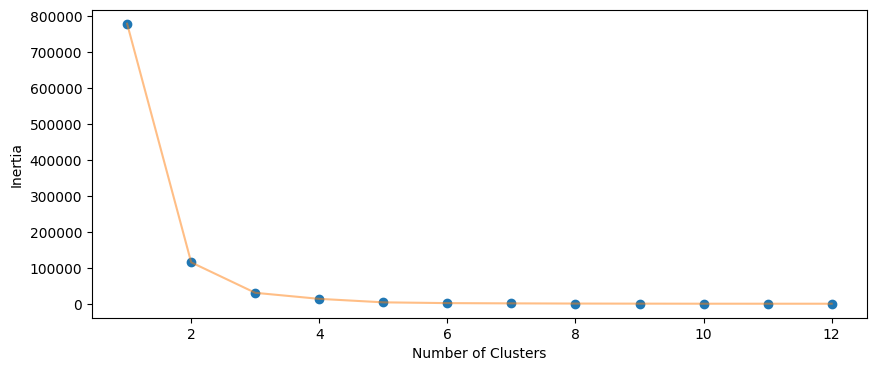

In [21]:
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1 , 13) , inertia , 'o')
plt.plot(np.arange(1 , 13) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [22]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [23]:
h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

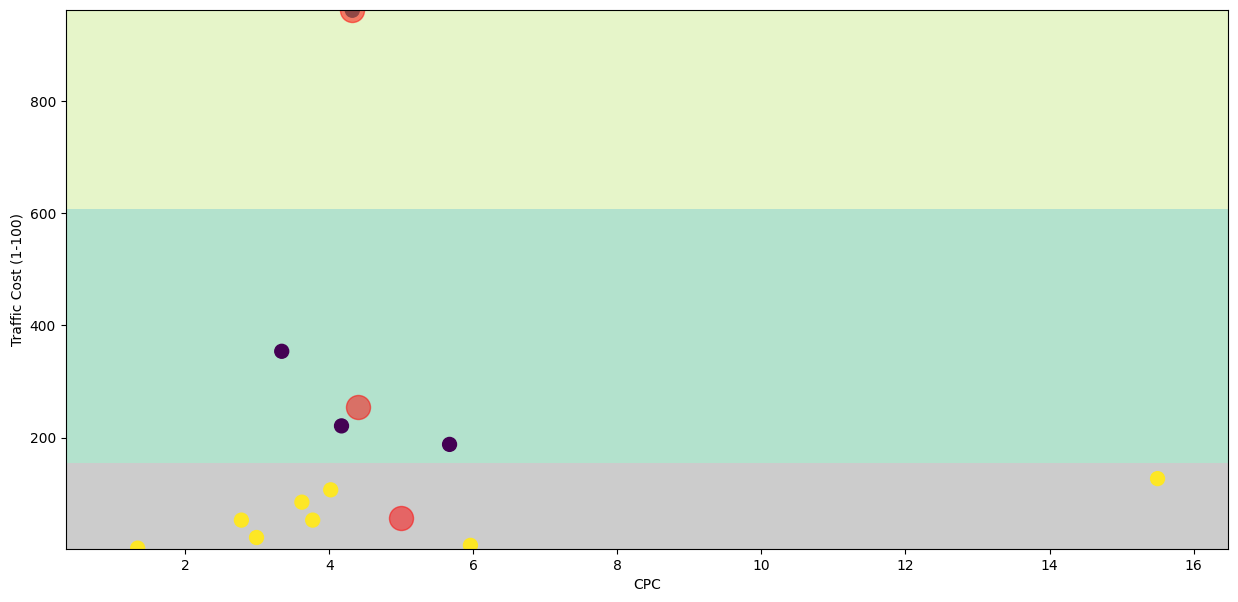

In [25]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'CPC', y = 'Traffic Cost', data = data, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Traffic Cost (1-100)') , plt.xlabel('CPC')
plt.show()